<a href="https://colab.research.google.com/github/eniohandy/aula/blob/main/aula_de_pos_(copia_de_seguranca).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importação de Dados

In [ ]:
# copia do banco de dados do artigo, que cita os dados deste teste
from os.path import exists
if (exists('/content/aula/') == False):
   ! git clone https://github.com/eniohandy/aula.git
!ls
!pwd

parole.csv  README
/content/aula


In [ ]:
# muda para diretorio onde esta o arquivo de teste
%cd /content/aula/
!pwd

/content/aula
/content/aula


In [ ]:
#lista os arquivos
!ls

parole.csv  README


In [ ]:
# pacotes basicos para o teste
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('parole.csv')
dataset.head(3)

,male,race,age,state,time.served,max.sentence,multiple.offenses,crime,violator
0,1,1,33.2,1,5.5,18,0,4,0
1,0,1,39.7,1,5.4,12,0,3,0
2,1,2,29.5,1,5.6,12,0,3,0


In [ ]:
dataset

,male,race,age,state,time.served,max.sentence,multiple.offenses,crime,violator
0,1,1,33.2,1,5.5,18,0,4,0
1,0,1,39.7,1,5.4,12,0,3,0
2,1,2,29.5,1,5.6,12,0,3,0
3,1,1,22.4,1,5.7,18,0,1,0
4,1,2,21.6,1,5.4,12,0,1,0
...,...,...,...,...,...,...,...,...,...
670,1,1,47.1,4,4.2,16,1,1,0
671,0,1,47.5,1,5.2,16,0,3,0
672,1,1,45.4,1,5.7,12,0,3,0
673,1,1,38.4,1,1.8,18,0,1,0


In [ ]:
# descrição dos valores da tabela
# veja que para a maioria, médias e percentis não fazem sentido
dataset.describe()

,male,race,age,state,time.served,max.sentence,multiple.offenses,crime,violator
count,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000
mean,0.807407,1.423704,34.512296,2.887407,4.198074,13.056296,0.536296,2.059259,0.115556
std,0.394628,0.494511,10.351541,1.226224,1.226855,3.056797,0.499051,1.135892,0.319928
min,0.000000,1.000000,18.400000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,25.350000,2.000000,3.250000,12.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,33.700000,3.000000,4.400000,12.000000,1.000000,2.000000,0.000000
75%,1.000000,2.000000,42.550000,4.000000,5.200000,15.000000,1.000000,3.000000,0.000000
max,1.000000,2.000000,67.000000,4.000000,6.000000,18.000000,1.000000,4.000000,1.000000


#Aqui começa a análise via Machine Learning
Vejam que no nosso caso não foi preciso limpar a base.
Na realidade, isso NUNCA acontece

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# X contém as todas as colunas, menos a última
X = dataset.iloc[:,:8].values
X[0]
y = dataset.iloc[:,8:9].values


In [ ]:
# Programa automático para dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print("tamanho do teste", X_test.shape)
print("tamanho do treino", X_train.shape)
print(y_test.shape)
print(y_train.shape)


tamanho do teste (169, 8)
tamanho do treino (506, 8)
(169, 1)
(506, 1)


In [ ]:
# NORMALIZAÇÃO DE DADOS
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test  = sc.fit_transform(X_test)

In [ ]:
X_test

array([[ 0.46457221,  1.1748539 , -0.29542369, ..., -0.4526105 ,
        -1.09307145, -0.22579734],
       [ 0.46457221, -0.85116966, -0.8617897 , ...,  0.80650349,
        -1.09307145, -1.07379181],
       [ 0.46457221,  1.1748539 ,  0.85650718, ...,  1.43606049,
        -1.09307145, -0.22579734],
       ...,
       [ 0.46457221, -0.85116966,  0.11735154, ...,  0.17694649,
         0.91485328, -1.07379181],
       [ 0.46457221, -0.85116966, -0.73699719, ...,  0.17694649,
         0.91485328,  1.47019159],
       [ 0.46457221,  1.1748539 ,  1.13489048, ..., -0.4526105 ,
         0.91485328, -1.07379181]])

In [ ]:
# ajuste para array 1D
y_test_1 = np.ravel(y_test)
y_test_1
y_train_1 = np.ravel(y_train)

In [ ]:
# Escolha de um classificador baseado em vizinhança (kNN onde k=1)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(5)
classifier.fit(X_train,y_train_1)


KNeighborsClassifier()

#Conclusões depois do treino

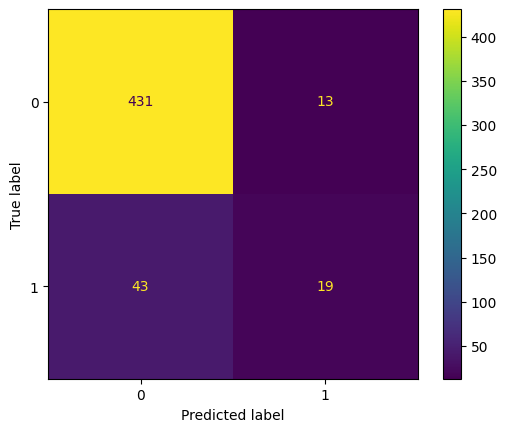

In [ ]:
# Predição certa
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predict = classifier.predict(X_train)
cm = confusion_matrix(y_train_1, predict, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()


In [ ]:
# Predição
predict = classifier.predict(X_test)

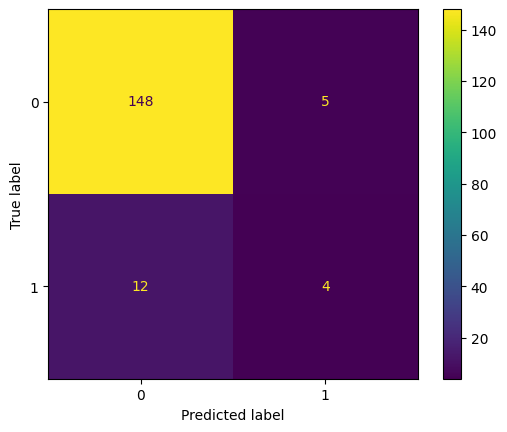

In [ ]:
cm = confusion_matrix(y_test_1, predict, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [ ]:
# resultados numéricos
from sklearn.metrics import accuracy_score
print (predict)
print (y_test_1)

accuracy_score(predict, y_test_1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


0.8994082840236687

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_1, predict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       153
           1       0.44      0.25      0.32        16

    accuracy                           0.90       169
   macro avg       0.68      0.61      0.63       169
weighted avg       0.88      0.90      0.89       169



#Testando um caso

In [ ]:
# pegar um valor, normalizar e testar
dataset[dataset['violator'] == 1]
caso = dataset.iloc[25,0:8]
caso = np.ravel(caso)
caso


array([ 1. ,  1. , 29.5,  1. ,  3.9, 16. ,  0. ,  1. ])

In [ ]:
# caso = X_test[1]
caso = np.reshape(caso, (1,-1))
caso = sc.fit_transform(caso)
caso

array([[0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
predicao = classifier.predict(caso)
predicao

array([0])